In [80]:
# import necessary libraries and packages

import pandas as pd , numpy as np , seaborn as sns , matplotlib.pyplot as plt , scipy.stats as stats
from matplotlib.lines import Line2D
plt.style.use('ggplot')

In [81]:
# load the dataset 

df = pd.read_csv(r'C:\Users\user\New folder\LuxDev\titanic.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
# find the population mean 

population_mean = df.Age.mean() # calculate the mean of the 'Age' column
population_mean

29.69911764705882

In [83]:
# calculate the mean age by using a sample 

sample = df.sample(n=50, random_state=25) # select a random sample of 50 rows from the dataframe

#calculate the sample mean age 
sample_mean = sample.Age.mean() # calculate the mean of the age column in the sample
sample_mean

31.894736842105264

In [84]:
# quantitating the error we have 

# find the difference between the sample and population mean 
err = np.abs(sample_mean - population_mean) # absolute value to ensure positive error
err

# divide by the population mean to find a percent error 
per_err = err / population_mean # percent error is the absolute error divided by the population mean
per_err 



0.0739287685627213

In [85]:
# calculating five sample means to increase accuracy

five_sample_means = []
for i in range(5):
    sample = df.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.Age.mean())

five_sample_means    

[27.504146341463418,
 28.30263157894737,
 26.83783783783784,
 31.75,
 28.573170731707318]

In [86]:
# calculate the errors again 
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
print(five_sample_errors)  # [0.0, 0.0, 0

[0.07390695345498845, 0.047021129876892075, 0.09634224973361595, 0.06905532943145481, 0.037911796866564734]


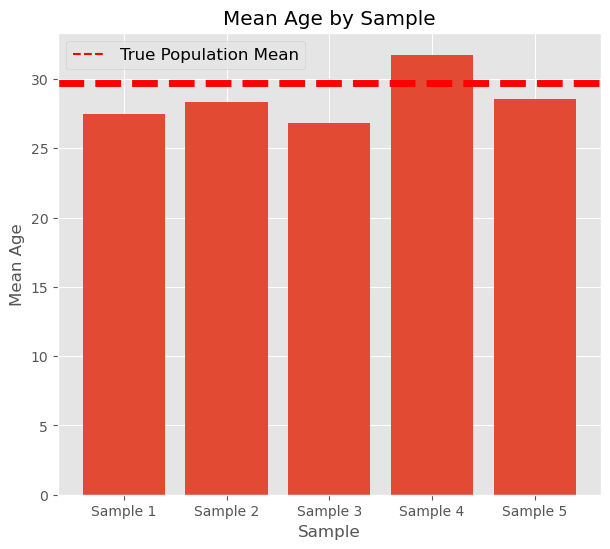

In [87]:
# now, we can visualize this as a bar chart, where each x tick is a different sample

x_labels = [f"Sample {x}" for x in range(1, 6)] # create labels for the x ticks

fig, ax = plt.subplots(figsize=(7,6)) # create a new figure and axis object

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Mean Age")
ax.set_title("Mean Age by Sample")
ax.set_xlabel("Sample")
ax.axhline(y=population_mean, linewidth=5, color='r', linestyle='--') # add a horizontal line at the population mean
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="large"
)

In [88]:
# sample means for 10,000 samples 

sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean())

len(sample_means)    

10000

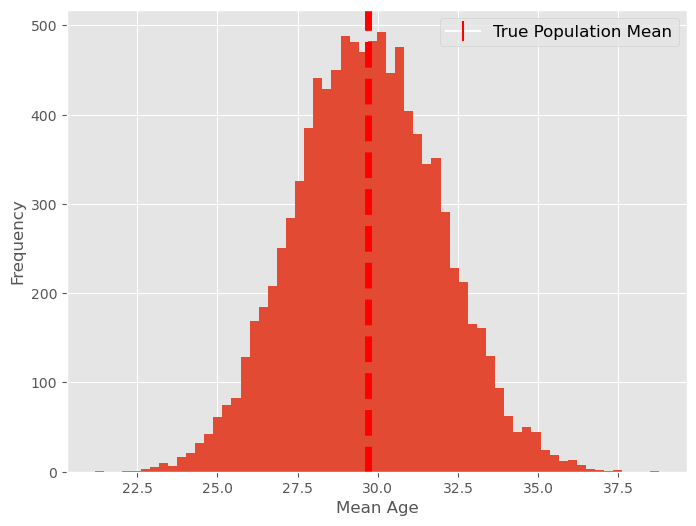

In [89]:
# using the overall distribution of mean ages

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(sample_means, bins="auto")
ax.set_xlabel("Mean Age")
ax.set_ylabel("Frequency")
ax.axvline(x=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D(
        [0],[0],
        color="white",
        marker="|",
        markersize=15,
        markeredgewidth=1.5,
        markeredgecolor="red"
    )],
    labels=["True Population Mean"],
    fontsize="large"
);


In [90]:
# get a 10000 sample mean 

ten_thousand_samples_mean = np.mean(sample_means)
ten_thousand_samples_mean

29.678139189972246

In [91]:
# check the original population mean 
population_mean


29.69911764705882

In [92]:
# calculate the error 

err = np.abs(ten_thousand_samples_mean - population_mean) / population_mean 
err

#calculate accuracy 

accuracy = 1 - err
accuracy

0.9992936336582157

In [93]:
# load practice data 
data = pd.read_csv(r'C:\Users\user\Downloads\weight-height.csv')

print(data.head())
data.describe()

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698
